In [28]:
import torch
import torchio as tio
import numpy as np 
import imageio
import matplotlib.pyplot as plt

C:\Users\20212059\AppData\Local\Temp\ipykernel_8540\1008207051.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagee = imageio.imread("../DevelopmentData/DevelopmentData/p102/mr_bffe.mhd")


(86, 333, 271)

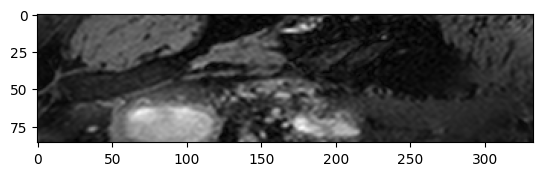

In [65]:
imagee = imageio.imread("../DevelopmentData/DevelopmentData/p102/mr_bffe.mhd")

plt.imshow(imagee[:,:,80], cmap='grey')
np.shape(imagee)


In [112]:
transforms_compose = [
    tio.RandomElasticDeformation(
        num_control_points=(7),  # or just 7
        locked_borders=2,
        image_interpolation='bspline'
    ),
    tio.RandomGamma(
        log_gamma=(-0.3, 0.3)
    )
  ]  

transform = tio.Compose(transforms_compose)

torchimage = tio.Image("../DevelopmentData/DevelopmentData/p102/mr_bffe.mhd");

transformed_image = transform(torchimage);

transformed_image_array = transformed_image.numpy()


C:\Users\20212059\AppData\Local\Temp\ipykernel_8540\911892380.py:14: DeprecationWarning: Not specifying the image type is deprecated and will be mandatory in the future. You can probably use tio.ScalarImage or tio.LabelMap instead
  torchimage = tio.Image("../DevelopmentData/DevelopmentData/p102/mr_bffe.mhd");


Text(0.5, 1.0, 'Augmented image')

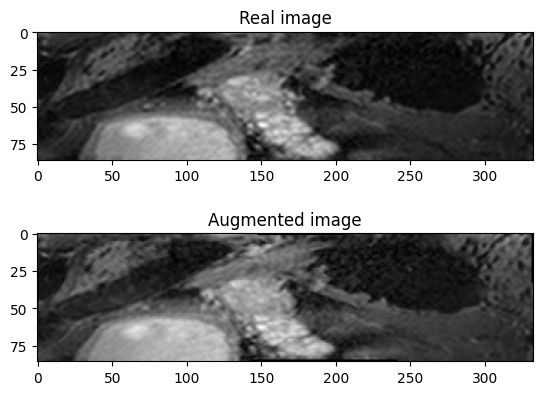

In [113]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(imagee[:,:,100], cmap='gray')
ax[1].imshow(transformed_image_array.transpose()[:,:,100,0], cmap='gray')

ax[0].set_title("Real image")
ax[1].set_title("Augmented image")